# Построение параметрического портрета системы. Нахождение областей множественности стационарных состояний и автоколебаний.

## Модель № 4

Рассмотреть автокаталитическую химическую реакцию, происходящую на поверхности катализатора. Кинетическая схема реакции имеет вид
$$
1)\; X + ^* \xLeftrightarrow[k_{+1}]{k_{-1}}[X], \quad 2)\; [X] + 2 ^* \xrightarrow{k_2} 3 ^* + X, \quad 3)\; X  \xLeftrightarrow[k_{+3}]{k_{-3}}[Y].
$$

Схеме отвечает математическая модель, описывающая изменение концентраций адсорбированных веществ $[X]$ и $[Y]$, $x$ и $y$:
$$
\begin{align}
\frac{dx}{dt} &= k_1 z - k_{-1}x - k_3 x + k_{-3} y - k_2 z^2 x, \\
\frac{dy}{dt} &= k_3 x - k_{-3} y.
\end{align}
$$
Здесь $z = 1 - x - y$ - концентрация свободных мест. 

$0 \leq x \leq 1, \; 0 \leq y \leq 1, \; 0\leq x + y \leq 1$.

Базовый набор параметров: $k_1 = 1, \; k_{-1} = 0.01, \; k_3 = 0.0032, \; k_{2} = 2, \; k_{-3} = 0.002$. 



In [2]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Предварительные выкладки

Найдем **стационарные решения**, т.е.решение системы
$$
\begin{align*}
\frac{dx}{dt} &= k_1 z - k_{-1}x - k_3 x + k_{-3} y - k_2 z^2 x = 0, \\
\frac{dy}{dt} &= k_3 x - k_{-3} y = 0.
\end{align*}
$$
Подставим $z = 1 - x - y$:
$$
\begin{align}
f_1(x,y) &:= k_1 (1 - x - y) - k_{-1}x - k_3 x + k_{-3} y - k_2 (1 - x - y)^2 x = 0, \\
f_2(x,y)&:= k_3 x - k_{-3} y = 0.
\end{align}
$$
Построим матрицу $A$:
$$
A = 
\begin{bmatrix}
a_{11} & a_{12} \\ 
a_{21} & a_{22}
\end{bmatrix}
= 
\begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\ 
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} 
\end{bmatrix}.
$$
Вычисляя производные, находим
$$
\begin{align*}
a_{11} &= -k_1 - k_{-1} - k_3 - k_2 (1 - x - y)^2 + 2 k_2 x (1 - x - y), \\ 
a_{12} &= -k_1 +k_{-3} + 2 k_2 (1-x-y) x\\
a_{21} &= k_3, \\ 
a_{22} &= -k_{-3}.
\end{align*}
$$
Выразим из (2) $y$ и подставим в (1). Получим зависимость $k_1$ от остальных параметров: 
$$
y = x \frac{k_3}{k_{-3}}, \qquad k_1 = \frac{k_{-1} x + k_2 x (1-x-y)^2}{(1-x-y)}.
$$
Вычислим след $S_A$ матрицы Якоби $A$ и ее определитель $\Delta A$:

In [3]:
k1, k1m, k3, k2, x, y, z, k3m = symbols('k_1 k_{-1} k_3 k_2 x y z k_{-3}')

a11 = -k1 -k1m -k3 -k2 * (z ** 2) + 2 * k2 * x * z
a12 = -k1 + k3m + 2* k2* z * x
a21 = k3
a22 = -k3m

dA = a11*a22-a12*a21
SA = a11+a22

print(latex(dA))
print(latex(SA))

- k_{3} \left(- k_{1} + 2 k_{2} x z + k_{-3}\right) - k_{-3} \left(- k_{1} + 2 k_{2} x z - k_{2} z^{2} - k_{3} - k_{-1}\right)
- k_{1} + 2 k_{2} x z - k_{2} z^{2} - k_{3} - k_{-1} - k_{-3}


Итого имеем:
$$
\Delta A = - k_{3} \left(- k_{1} + 2 k_{2} x z + k_{-3}\right) - k_{-3} \left(- k_{1} + 2 k_{2} x z - k_{2} z^{2} - k_{3} - k_{-1}\right)
$$
$$
S_A = - k_{1} + 2 k_{2} x z - k_{2} z^{2} - k_{3} - k_{-1} - k_{-3}
$$

Подставим функцию $y(x)$ в уравнения, определяющие **линию нейтральности** $(S_A = 0)$ и **линию кратности** $(\Delta A = 0)$, и тоже выразим параметр $k_1$ через другие параметры и переменную $x$ и приравняем поочередно к функции $k_1$. Из полученных равенств найдем зависимости $k_2(x)$ на линиях кратности и нейтральности.

In [4]:
yx = x * k3 / k3m

k1x = (k1m * x + k2 * x * z ** 2) / z

zx = 1 - x - y

# На линиях кратности

k1_dA = solve(dA, k1)[0]

k2_dA = solve(k1_dA-k1x, k2)[0]

simplify(k1_dA)

(2*k_2*k_3*x*z + 2*k_2*k_{-3}*x*z - k_2*k_{-3}*z**2 - k_{-1}*k_{-3})/(k_3 + k_{-3})

In [5]:
simplify(k2_dA)

k_{-1}*(k_3*x + k_{-3}*x + k_{-3}*z)/(z**2*(k_3*x + k_{-3}*x - k_{-3}*z))

In [6]:
# На линиях нейтральности

k1_SA = solve(SA, k1)[0]

k2_SA = solve(k1_SA-k1x, k2)[0]

simplify(k2_SA)

(k_3*z + k_{-1}*x + k_{-1}*z + k_{-3}*z)/(z**2*(x - z))

### Двупараметрический анализ на плоскости $(k_1, k_2)$

In [7]:
k1m_val = 0.01
k3m_val = 0.002
k3_val = 0.0032
x_arr = np.linspace(0.001, 0.997, 500)
n = len(x_arr)

#### Расчет линий нейтральности

In [8]:
# Подставляем значения коэффициентов и выражение для y(x)

k2_SA = k2_SA.subs(z, zx)
k2_SA = k2_SA.subs(y, yx)

k2_SA = k2_SA.subs(k1m, k1m_val)
k2_SA = k2_SA.subs(k3m, k3m_val)
k2_SA = k2_SA.subs(k3, k3_val)

k1_SA = k1_SA.subs(z, zx)
k1_SA = k1_SA.subs(y, yx)

k1_SA = k1_SA.subs(k1m, k1m_val)
k1_SA = k1_SA.subs(k3m, k3m_val)
k1_SA = k1_SA.subs(k3, k3_val)

dA = dA.subs(z, zx)
dA = dA.subs(y, yx)

dA = dA.subs(k1m, k1m_val)
dA = dA.subs(k3m, k3m_val)
dA = dA.subs(k3, k3_val)

# Получаем значения на сетке по х
k2_SA_val = np.array([k2_SA.subs(x, x_val) for x_val in x_arr])
k1_SA_val = [k1_SA.subs(x, x_val).subs(k2, k2_val) for x_val, k2_val in zip(x_arr, k2_SA_val)]

dA_val = np.array([dA.subs(x, x_val).subs(k2, k2_val).subs(k1, k1_val) for x_val, k2_val, k1_val in zip(x_arr, k2_SA_val, k1_SA_val)])

k2_SA_val[dA_val <= 0] = -1

#### Расчет линии кратности

In [9]:
# Подставляем значения коэффициентов и выражение для y(x)

k2_dA = k2_dA.subs(z, zx)
k2_dA = k2_dA.subs(y, yx)

k2_dA = k2_dA.subs(k1m, k1m_val)
k2_dA = k2_dA.subs(k3m, k3m_val)
k2_dA = k2_dA.subs(k3, k3_val)

k1_dA = k1_dA.subs(z, zx)
k1_dA = k1_dA.subs(y, yx)

k1_dA = k1_dA.subs(k1m, k1m_val)
k1_dA = k1_dA.subs(k3m, k3m_val)
k1_dA = k1_dA.subs(k3, k3_val)

# Получаем значения на сетке по х
k2_dA_val = np.array([k2_dA.subs(x, x_val) for x_val in x_arr])
k1_dA_val = [k1_dA.subs(x, x_val).subs(k2, k2_val) for x_val, k2_val in zip(x_arr, k2_dA_val)]

#### Параметрический портрет

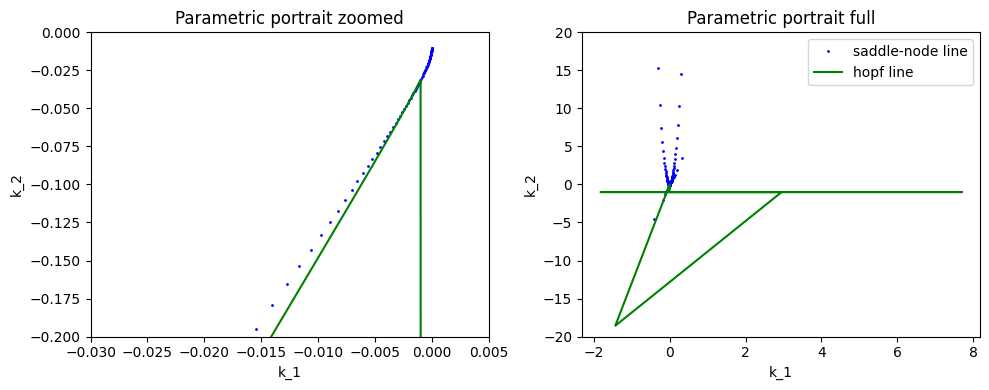

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title('Parametric portrait zoomed')
plt.plot(k1_dA_val, k2_dA_val, 'bo', markersize=1, label='saddle-node line')
plt.plot(k1_SA_val, k2_SA_val, 'g-', label='hopf line')
ax = plt.gca()
ax.set_xlabel('k_1')
ax.set_ylabel('k_2')
ax.set_xlim([-0.03, 0.005])
ax.set_ylim([-0.2, 0])

plt.subplot(1,2,2)
plt.title('Parametric portrait full')
plt.plot(k1_dA_val, k2_dA_val, 'bo', markersize=1, label='saddle-node line')
plt.plot(k1_SA_val, k2_SA_val, 'g-', label='hopf line')
ax = plt.gca()
ax.set_ylim([-20, 20])
ax.set_xlabel('k_1')
ax.set_ylabel('k_2')
plt.legend()
plt.tight_layout()
plt.show()

### Однопараметрический анализ по параметру $k_1$

#### Зависимость стационарных решений $x_c$ и $y_c$ от $k_1$

In [11]:
k1, k1m, k3, k2, x, y, z, k3m = symbols('k_1 k_{-1} k_3 k_2 x y z k_{-3}')

a11 = -k1 -k1m -k3 -k2 * (z ** 2) + 2 * k2 * x * z
a12 = -k1 + k3m + 2* k2* z * x
a21 = k3
a22 = -k3m

dA = a11*a22-a12*a21
SA = a11+a22
DI = SA ** 2 - 4 * dA

In [12]:
k1m_val = 0.01
k3m_val = 0.002
k3_val = 0.0032
k2_val = 2

x_arr = np.linspace(0.001, 0.997, 500)

In [13]:
yx = x * k3 / k3m

k1x = (k1m * x + k2 * x * z ** 2) / z

zx = 1 - x - y

In [14]:
y_val = yx.subs(k3, k3_val)
y_val = y_val.subs(k3m, k3m_val)

y_val

1.6*x

In [15]:
k1_val = k1x.subs(z, zx)
k1_val = k1_val.subs(y, yx)
k1_val = k1_val.subs(k3, k3_val)
k1_val = k1_val.subs(k3m, k3m_val)
k1_val = k1_val.subs(k1m, k1m_val)
k1_val = k1_val.subs(k2, k2_val)


k1_val

(13.52*x*(0.384615384615385 - x)**2 + 0.01*x)/(1 - 2.6*x)

In [16]:
dA_val = dA.subs(k1, k1x)
dA_val = dA_val.subs(z, zx)
dA_val = dA_val.subs(y, yx)
dA_val = dA_val.subs(k3, k3_val)
dA_val = dA_val.subs(k3m, k3m_val)
dA_val = dA_val.subs(k1m, k1m_val)
dA_val = dA_val.subs(k2, k2_val)


dA_val

-0.0208*x*(1 - 2.6*x) + 0.02704*(0.384615384615385 - x)**2 + 2.0e-5 + 0.0052*(13.52*x*(0.384615384615385 - x)**2 + 0.01*x)/(1 - 2.6*x)

In [17]:
SA_val = SA.subs(k1, k1x)
SA_val = SA_val.subs(z, zx)
SA_val = SA_val.subs(y, yx)
SA_val = SA_val.subs(k3, k3_val)
SA_val = SA_val.subs(k3m, k3m_val)
SA_val = SA_val.subs(k1m, k1m_val)
SA_val = SA_val.subs(k2, k2_val)


SA_val

4*x*(1 - 2.6*x) - 13.52*(0.384615384615385 - x)**2 - 0.0152 - (13.52*x*(0.384615384615385 - x)**2 + 0.01*x)/(1 - 2.6*x)

In [18]:
# Получаем значения на сетке по х
k1_plot = np.array([k1_val.subs(x, x_val) for x_val in x_arr])
y_plot = np.array([y_val.subs(x, x_val) for x_val in x_arr])

In [19]:
# Точки бифуркации Хопфа

SA_plot = np.array([SA_val.subs(x, x_val) for x_val in x_arr])
SA_roll = np.roll(SA_plot, 1)

SA_mask = SA_plot * SA_roll <= 0

x_hopf_points = x_arr[SA_mask]
y_hopf_points = y_plot[SA_mask]
k1_hopf_point = k1_plot[SA_mask]

# Седловые точки 

dA_plot = np.array([dA_val.subs(x, x_val) for x_val in x_arr])
dA_roll = np.roll(dA_plot, 1)

dA_mask = dA_plot * dA_roll <= 0

x_saddle_points = x_arr[dA_mask]
y_saddle_points = y_plot[dA_mask]
k1_saddle_point = k1_plot[dA_mask]

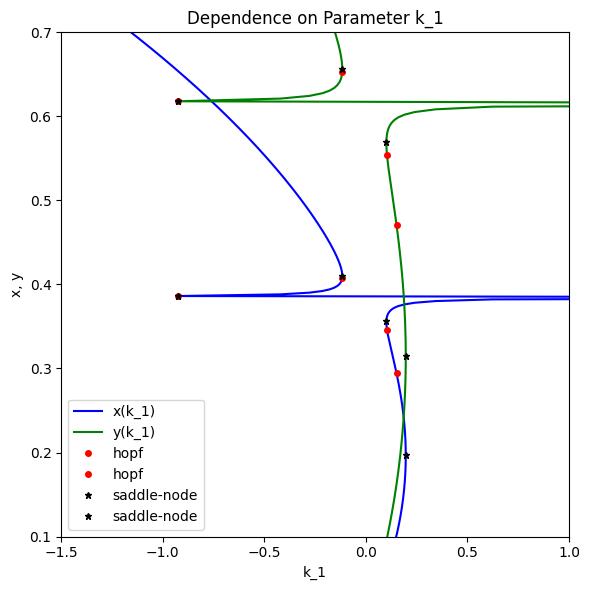

In [20]:
plt.figure(figsize=(6, 6))
plt.title('Dependence on Parameter k_1')
plt.plot(k1_plot, x_arr, 'b-', markersize=1, label='x(k_1)')
plt.plot(k1_plot, y_plot, 'g-', label='y(k_1)')

plt.plot(k1_hopf_point, x_hopf_points, 'ro', markersize=4, label='hopf')
plt.plot(k1_hopf_point, y_hopf_points, 'ro', markersize=4, label='hopf')

plt.plot(k1_saddle_point, x_saddle_points, 'k*', markersize=5, label='saddle-node')
plt.plot(k1_saddle_point, y_saddle_points, 'k*', markersize=5, label='saddle-node')

ax = plt.gca()
ax.set_xlabel('k_1')
ax.set_ylabel('x, y')
ax.set_xlim([-1.5, 1])
ax.set_ylim([0.1, 0.7])

plt.legend()
plt.tight_layout()
plt.show()

### Численное моделирование решения системы

Необходимо найти численное решение системы
$$
\begin{align*}
\frac{dx}{dt} &= k_1 z - k_{-1}x - k_3 x + k_{-3} y - k_2 z^2 x, \\
\frac{dy}{dt} &= k_3 x - k_{-3} y.
\end{align*}
$$
Подставим $z = 1 - x - y$:
$$
\begin{align}
f_1(x,y) &:= k_1 (1 - x - y) - k_{-1}x - k_3 x + k_{-3} y - k_2 (1 - x - y)^2 x, \\
f_2(x,y)&:= k_3 x - k_{-3} y.
\end{align}
$$

Базовый набор параметров: $k_1 = 1, \; k_{-1} = 0.01, \; k_3 = 0.0032, \; k_{2} = 2, \; k_{-3} = 0.002$. 

In [30]:
k1 = 1
k1m = 0.01
k3 = 0.0032
k2 = 2
k3m = 0.002

def ode_system(t, y):
    '''
    y[0] ~ x
    y[1] ~ y
    '''
    return [k1 * (1 - y[0] - y[1]) - k1m * y[0] - k3 * y[0] + k3m * y[1] - k2 * (1 - y[0] - y[1])**2 * y[0],
            k3 * y[0] - k3m * y[1]]

In [68]:
t = np.linspace(0, 2000, 100)
result = solve_ivp(ode_system, (0, 2000), [7/8, 1/8], t_eval=t)

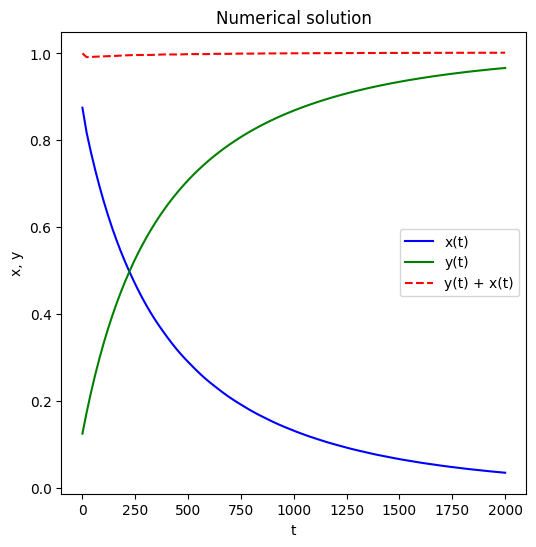

In [69]:
plt.figure(figsize=(6, 6))
plt.title('Numerical solution')
plt.plot(t, result.y[0], 'b-', markersize=1, label='x(t)')
plt.plot(t, result.y[1], 'g-', markersize=1, label='y(t)')

plt.plot(t, result.y[1] + result.y[0], 'r--', markersize=1, label='y(t) + x(t)')


ax = plt.gca()
ax.set_xlabel('t')
ax.set_ylabel('x, y')

plt.legend()
plt.show()